In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline

In [2]:
# 如果是linux系统
trainPath = os.getcwd()+'/processed_train2.csv'
testPath = os.getcwd()+'/processed_test2.csv'
train_df = pd.read_csv(trainPath, index_col=0)
test_df = pd.read_csv(testPath, index_col=0)

In [3]:
X_train = train_df
y_train = X_train.pop('acc_now_delinq')
X_test = test_df

In [4]:
from numpy import sort
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

In [5]:
def f_beta_wrapper(y,t):
    t = t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y] # binaryzing your output
    
    return 'f2',-fbeta_score(t,y_bin, beta=2)


## 特征重要性(但其实和mth_since_last_major_derog强相关)

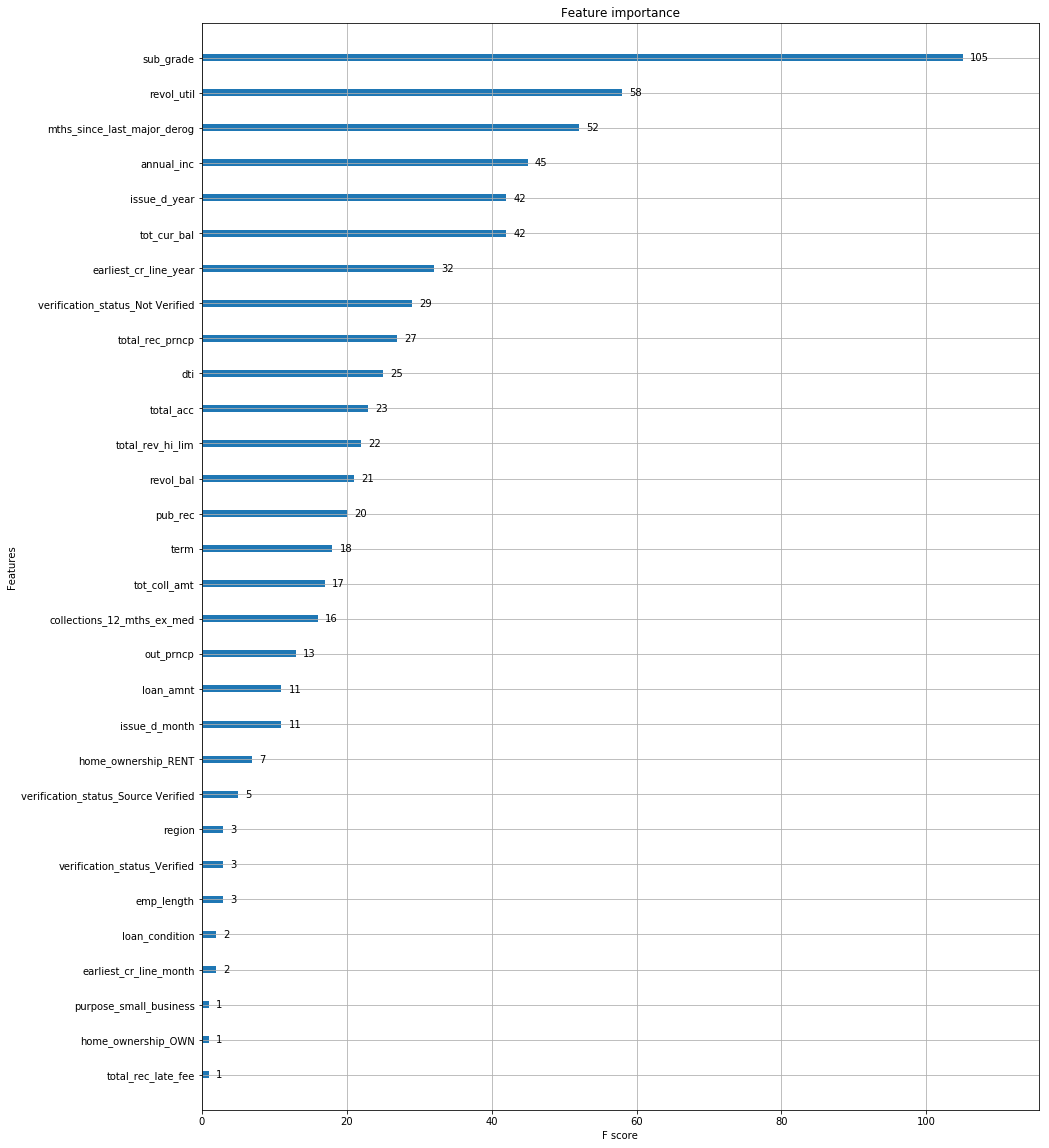

In [6]:
xgb_select = XGBClassifier(scale_pos_weight= 100)
xgb_select.fit(X_train, y_train,eval_metric = f_beta_wrapper )
fig, ax = plt.subplots(figsize=(15, 20))
plot_importance(xgb_select,ax=ax)


In [8]:
y_pred = xgb_select.predict(X_train)
predictions = [round(value) for value in y_pred]

/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [9]:
sum(predictions),y_pred.sum(),fbeta_score(y_train, y_pred, beta= 2)

(39645, 39645, 0.17191434575988793)

## 特征选择

In [10]:
imp_values=xgb_select.feature_importances_

In [11]:
fea_names=train_df.columns.values

In [12]:
feature_importance=pd.Series(imp_values,index=fea_names)

In [13]:
fea_imp_order=feature_importance.sort_values(ascending=False)

In [14]:
fea_select =fea_imp_order.head(20)

In [16]:
X_train_select = X_train.loc[:,fea_select.index]

In [17]:
X_test_select =X_test.loc[:,fea_select.index]

In [18]:
X_train_select.shape,y_train.shape

((709903, 20), (709903,))

In [20]:
X_train_select = X_train_select.join(y_train)

In [21]:
X_train_select.to_csv("X_train_select.csv",encoding='utf-8')
X_test_select.to_csv("X_test_select.csv",encoding='utf-8')

## 删除极端值

In [22]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=5,contamination=0.003)
y_pred = lof.fit_predict(X_train_select)


In [33]:
X_train_select.shape,X_train_outlier.shape

((709903, 21), (707773, 21))

In [25]:
index_mumberid = X_train_select.index

In [26]:
index_mumberid

Int64Index([13599771,  1491956, 64687987,  8446850, 58471388,  5337525,
            30165519,  1909391, 43182363, 69222001,
            ...
            36224697, 28030199,  1640987, 43945052, 52315220, 60264189,
            65891998, 21528959,   801947, 34973374],
           dtype='int64', name='member_id', length=709903)

In [28]:
y_predict=pd.Series(y_pred,index=index_mumberid)#.value_counts()

In [ ]:
X_train_select.shape,predicted_outlier.shape

In [36]:
ANOMALY_DATA = 1
predicted_outlier_index = np.where(y_pred == ANOMALY_DATA)
X_train_outlier = X_train_select.iloc[predicted_outlier_index]
#cValues1 = pd.DataFrame(y_res[predicted_outlier_index])
#y_predicted_outlier = y_train.iloc[predicted_outlier_index]

In [38]:
X_train_outlier

,sub_grade,revol_util,mths_since_last_major_derog,annual_inc,issue_d_year,tot_cur_bal,earliest_cr_line_year,verification_status_Not Verified,total_rec_prncp,dti,...,total_rev_hi_lim,revol_bal,pub_rec,term,tot_coll_amt,collections_12_mths_ex_med,out_prncp,issue_d_month,loan_amnt,acc_now_delinq
member_id,,,,,,,,,,,,,,,,,,,,,
13599771,17,60.0,0,55000.0,2014,144784.000000,1985.0,0,3124.16,23.65,...,16700.000000,10020.0,1.0,0,0.00000,0.0,0.00,3,8875.0,0
1491956,4,88.0,0,43000.0,2012,139458.189336,1992.0,0,12500.00,10.58,...,32068.620045,13202.0,0.0,0,225.70261,0.0,0.00,5,12500.0,0
64687987,21,52.0,0,101300.0,2015,106215.000000,2001.0,0,1047.76,20.00,...,41300.000000,21467.0,0.0,1,770.00000,0.0,32552.24,9,33600.0,0
8446850,5,28.9,0,47840.0,2013,129416.000000,1988.0,0,17000.00,4.01,...,22800.000000,6585.0,0.0,1,102.00000,0.0,0.00,8,17000.0,0
58471388,17,40.5,0,30000.0,2015,15589.000000,1999.0,0,769.76,31.85,...,10300.000000,4167.0,0.0,1,0.00000,0.0,13230.24,7,14000.0,0
5337525,14,82.5,0,70000.0,2013,311770.000000,1983.0,0,24000.00,33.54,...,24600.000000,20288.0,0.0,1,0.00000,0.0,0.00,4,24000.0,0
30165519,16,48.9,0,40000.0,2014,10992.000000,2006.0,0,2160.51,8.49,...,8900.000000,4351.0,1.0,1,1380.00000,0.0,9839.49,10,12000.0,0
1909391,20,69.3,0,110000.0,2012,193824.000000,1998.0,0,6629.44,20.11,...,14800.000000,10255.0,0.0,1,0.00000,0.0,0.00,11,23325.0,0
43182363,7,65.6,0,100000.0,2015,241273.000000,1996.0,1,2197.75,9.89,...,36000.000000,23609.0,0.0,1,0.00000,0.0,12802.25,1,15000.0,0


In [43]:
X_train_outlier.to_csv("X_train_outlier.csv",encoding='utf-8')
#y_predicted_outlier.to_csv("y_predicted_outlier.csv",encoding='utf-8')

In [42]:
X_train_outlier.acc_now_delinq.value_counts()

0    704482
1      3291
Name: acc_now_delinq, dtype: int64

### 确定被选择的特征数量

In [59]:
thresholds = np.sort(xgb_select.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb_select, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier(scale_pos_weight= 100)
	selection_model.fit(select_X_train, y_train,eval_metric = f_beta_wrapper)
	# eval model
	select_X_train = selection.transform(X_train)
	y_pred = selection_model.predict(select_X_train)
	predictions = [round(value) for value in y_pred]
	f2 = fbeta_score(y_train, predictions,beta=2)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], f2))

/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.000, n=51, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.001, n=28, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.001, n=28, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.001, n=28, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.003, n=25, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.004, n=24, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.006, n=23, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.006, n=23, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.007, n=21, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.014, n=20, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.017, n=19, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.025, n=18, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.025, n=18, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.025, n=18, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.025, n=18, Accuracy: 0.10%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.030, n=14, Accuracy: 0.09%


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.030, n=14, Accuracy: 0.09%


KeyboardInterrupt: 